<a href="https://colab.research.google.com/github/anushChrist/ML_LAB/blob/main/2348504_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [388]:
df = pd.read_csv('/content/insurance.csv')

In [389]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [390]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [392]:
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


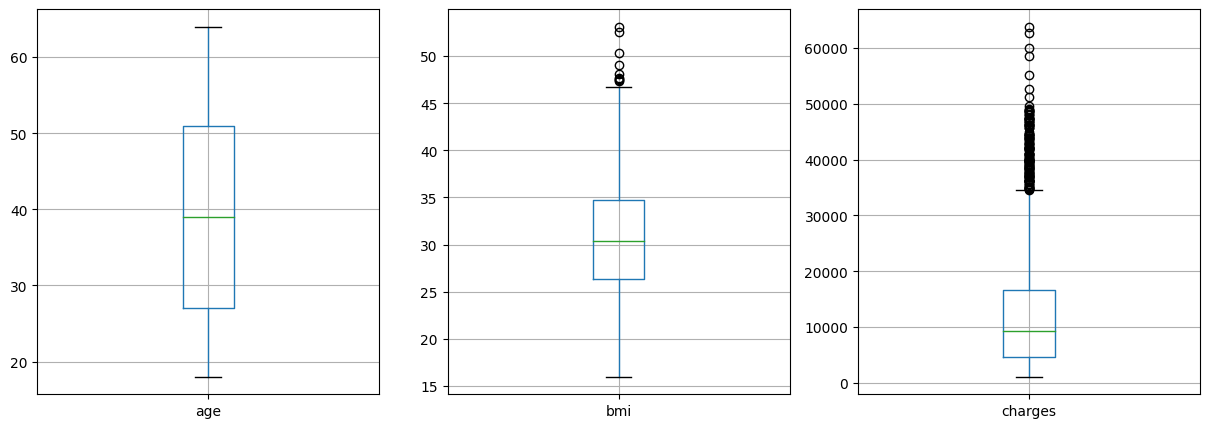

In [393]:
fig, axes = plt.subplots(ncols = 3, figsize = (15, 5))
df.boxplot(column='age', ax = axes[0])
df.boxplot(column='bmi',ax = axes[1])
df.boxplot(column='charges', ax = axes[2])
plt.show()

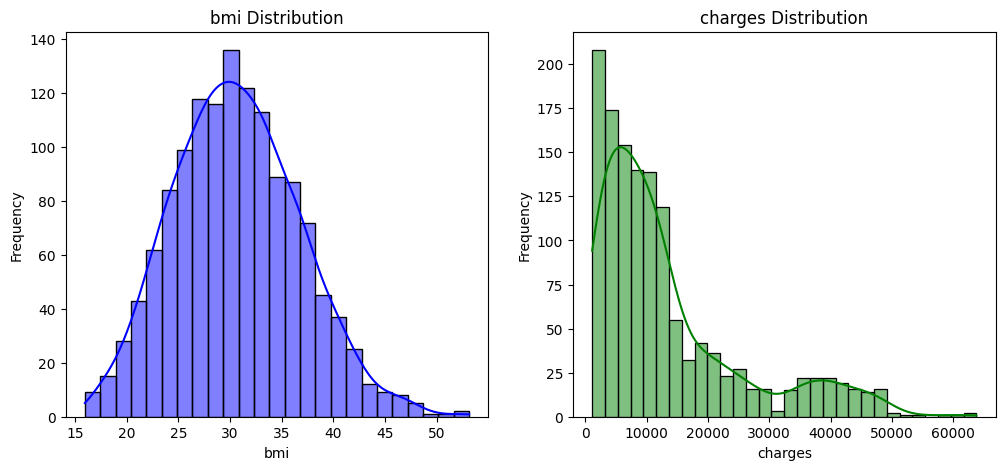

In [394]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['bmi'], kde=True, color='blue')
plt.title('bmi Distribution')
plt.xlabel('bmi')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['charges'], kde=True, color='green')
plt.title('charges Distribution')
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.show()

In [395]:
z_bmi = np.abs(df['bmi'] - df['bmi'].mean()) / df['bmi'].std()
z_charges = np.abs(df['charges'] - df['charges'].mean()) / df['charges'].std()
z_outliers = df[(z_bmi > 2) | (z_charges > 2)]
#df = df.drop(z_outliers.index)

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers_bmi = df[(df['bmi'] < Q1 - 1.5 * IQR) | (df['bmi'] > Q3 + 1.5 * IQR)]
df = df.drop(iqr_outliers_bmi.index)

Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers_charges = df[(df['charges'] < Q1 - 1.5 * IQR) | (df['charges'] > Q3 + 1.5 * IQR)]
df = df.drop(iqr_outliers_charges.index)

In [396]:
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#columns_to_scale = ['age', 'bmi', 'charges']
#scaler.fit(df[columns_to_scale])
#df[columns_to_scale] = scaler.transform(df[columns_to_scale])

In [397]:
X = df.drop(columns=['charges'])
Y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [398]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [399]:
y_pred = model.predict(x_test)

In [400]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

In [401]:
rss = np.sum((y_pred - y_test)**2)
n = len(x_test)
p = x_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [402]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')
print(f'Adjusted R-squared Score: {adj_r2:.2f}')
print(f'Residual Sum of Squares (RSS): {rss:.2f}')
print(f'Explained Variance Score: {explained_var:.2f}')

Mean Absolute Error (MAE): 2620.93
Mean Squared Error (MSE): 19877696.62
Root Mean Squared Error (RMSE): 4458.44
R-squared (R2) Score: 0.63
Adjusted R-squared Score: 0.62
Residual Sum of Squares (RSS): 4750769492.23
Explained Variance Score: 0.63


In [403]:
feature_importance = model.coef_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

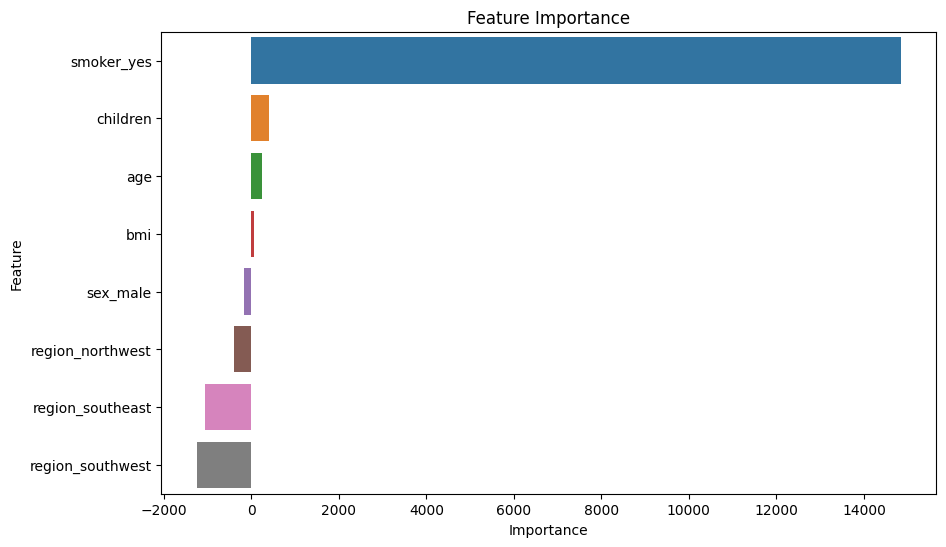

In [404]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

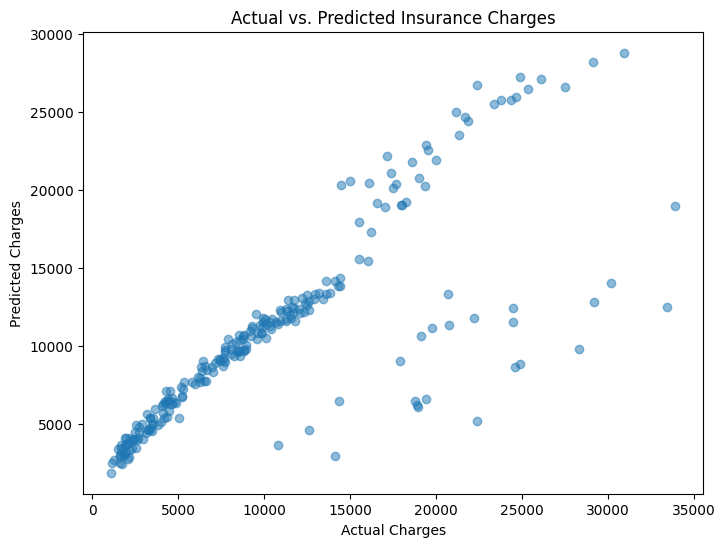

In [405]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.show()
